# Western States -  Finish Times

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We then analyse Finish Times in relation to Western States

In [2]:
df = pd.read_csv('../../data/ws_1km_splits_full.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,NaN,USA,6.265060,...,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,NaN,FRA,6.204819,...,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,6.325301,...,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,6.385542,...,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,6.566265,...,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802


### Winning Times

We will look at the winning times of each year

In [4]:
df['rank'] = df['rank'].fillna(1, limit=1)
df['rank'] = df['rank'].fillna(2, limit=2) 

In [5]:
def f(x):
    x = x.fillna(1, limit=1)
    x = x.fillna(2, limit=2)   
    return x

df['rank'] = df.groupby('Year')['rank'].apply(f)
df

,Unnamed: 0,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,1.0,USA,6.265060,...,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,2.0,FRA,6.204819,...,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,6.325301,...,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,6.385542,...,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,6.566265,...,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802
5,5,2018,22,86833df40eb250f7d663f1e7ef0e4dfd,Male,Senior Men (23-39),26.0,7.0,USA,6.506024,...,NaN,6.179775,NaN,7.758621,NaN,NaN,13.926471,4.507937,1014.816667,8.308553
6,6,2018,26,b84b0e481cdc0977d7d10df474bcf40b,Male,Senior Men (23-39),32.0,8.0,USA,6.506024,...,NaN,6.404494,NaN,8.448276,NaN,NaN,14.892157,6.023810,1019.283333,7.735322
7,7,2018,135,61243ef160c2b3103c107afb6c401fa8,Male,Senior Men (23-39),29.0,10.0,USA,6.686747,...,NaN,6.179775,NaN,8.620690,NaN,NaN,15.794118,5.928571,1040.150000,8.890250
8,8,2018,41,59f7f3d04e070256c7e80887a964a280,Male,Senior Men (23-39),32.0,11.0,USA,6.445783,...,NaN,6.629213,NaN,8.448276,NaN,NaN,15.259804,6.563492,1046.666667,8.904480
9,9,2018,118,fc04abca5043a15c26a46030050ae550,Male,Senior Men (23-39),31.0,13.0,USA,6.445783,...,NaN,6.067416,NaN,8.275862,NaN,NaN,14.990196,6.285714,1053.166667,8.929083


In [6]:
top = df[df['rank'] == 1]

In [7]:
top2 = df[df['rank'] == 2]

In [8]:
top2 = top2[top2['Year'] == 2016]

In [9]:
top = top.append(top2)

In [10]:
top

,Unnamed: 0,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,1.0,USA,6.265060,...,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
112,112,2017,27,196d4c89233fe69a5ff5b18e68440d8c,Male,Senior Men (23-39),32.0,1.0,USA,6.848394,...,NaN,6.067416,NaN,7.931034,NaN,NaN,13.529412,5.896825,1008.383333,6.755470
209,209,2016,11,1cf412738f54f3c853a16c2451925c34,Male,Senior Men (23-39),36.0,1.0,Norway,6.029116,...,6.883117,NaN,8.518519,NaN,NaN,NaN,17.352941,7.206349,976.133333,7.626730
306,306,2015,M1,6463711b9da07e8138f972992f0a54f3,Male,Senior Men (23-39),38.0,1.0,United States,5.783133,...,5.064935,NaN,7.037037,NaN,NaN,NaN,14.813725,5.055556,888.983333,6.219578
412,412,2014,M2,6463711b9da07e8138f972992f0a54f3,Male,Senior Men (23-39),37.0,1.0,United States,6.024096,...,4.805195,NaN,6.481481,NaN,3.918919,NaN,6.450980,5.920635,893.366667,5.695220
521,521,2013,M1,ad21ad1213126a24b513b5eab768f40a,Male,Senior Men (23-39),29.0,1.0,United States,5.722892,...,4.805195,NaN,6.481481,NaN,NaN,NaN,15.588235,4.023810,917.450000,6.309525
640,640,2012,M6,ad21ad1213126a24b513b5eab768f40a,Male,Senior Men (23-39),28.0,1.0,USA,5.963855,...,5.064935,NaN,6.296296,NaN,3.513514,NaN,6.176471,5.587302,886.733333,5.506792
766,766,2010,11,b860724022837221611c35f004ff54bf,Male,Senior Men (23-39),34.0,1.0,USA,NaN,...,5.064935,NaN,7.037037,NaN,3.648649,NaN,7.401961,4.714286,907.066667,5.798740
2383,2383,2016,28,9168792a1d1f0935c1582aba99cada57,Male,Youth Men (20-22),20.0,2.0,United States,6.061245,...,6.233766,NaN,7.407407,NaN,NaN,NaN,14.705882,6.000000,939.600000,7.107213


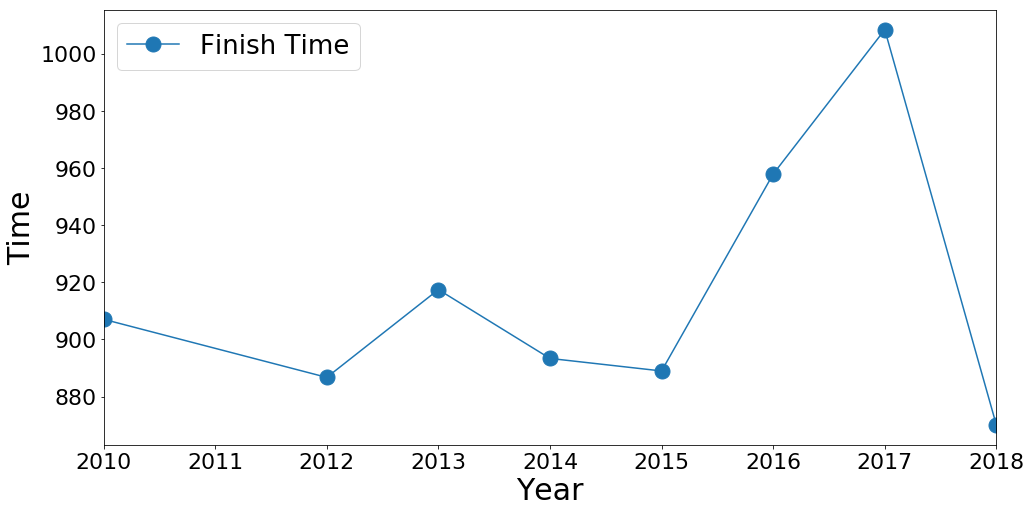

In [14]:
gen = top.groupby(['Year'])['time'].mean()
ax = gen.plot(figsize=(16, 8), fontsize=22, marker='o', ms=15)
ax.set_ylabel('Time', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Finish Time'], frameon=True, ncol=2, loc='upper left', fontsize = 26)

The peculiar thing about these results is that 2018 has the fastest finish time, and indeed the
record for the race. However, as we will see below, it has the slowest average pace
overall. This must have been an extremely impressive performance. The pattern is very similar
to the UTMB. The two years preceding the record had relatively slow finish times to the rest

In [15]:
test = df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 42 columns):
Unnamed: 0                           3021 non-null int64
Year                                 3021 non-null int64
bib                                  3021 non-null object
name_mask                            3021 non-null object
gender                               3021 non-null object
category                             3021 non-null object
runner_age                           3021 non-null float64
rank                                 2602 non-null float64
nationality                          3021 non-null object
Start to Lyon Ridge                  2454 non-null float64
Start to Talbot Creek                418 non-null float64
Lyon Ridge to Red Star Ridge         2526 non-null float64
Talbot Creek to Poppy Trailhead      391 non-null float64
Red Star Ridge to Duncan Canyon      2475 non-null float64
Poppy Trailhead to Duncan Canyon     411 non-null float64
Duncan Canyon to Mos

###  Average Finish Time

Finish Times gives an idea of whether the ultra marathon runners are improving over time. It
offers an alternative outlook than Average Pace, as it only acknowledged finishers, rather than
the Average Pace of every participant. This allows for naive runners, who may begin the race at
an extremely fast pace, and subsequently drop out after a few stages. Their average pace would
make the overall average pace seem faster than it is.


In [17]:
df.groupby(['Year', 'gender'])['time'].mean().unstack()

gender,Female,Male
Year,,
2010,1564.393503,1518.352726
2012,1459.146474,1484.230366
2013,1542.343910,1537.171037
2014,1548.233333,1478.477847
2015,1573.938679,1513.968333
2016,1582.008201,1523.690818
2017,1553.403333,1566.084826
2018,1508.053333,1522.079916


Text(0.5,0,'Gender')

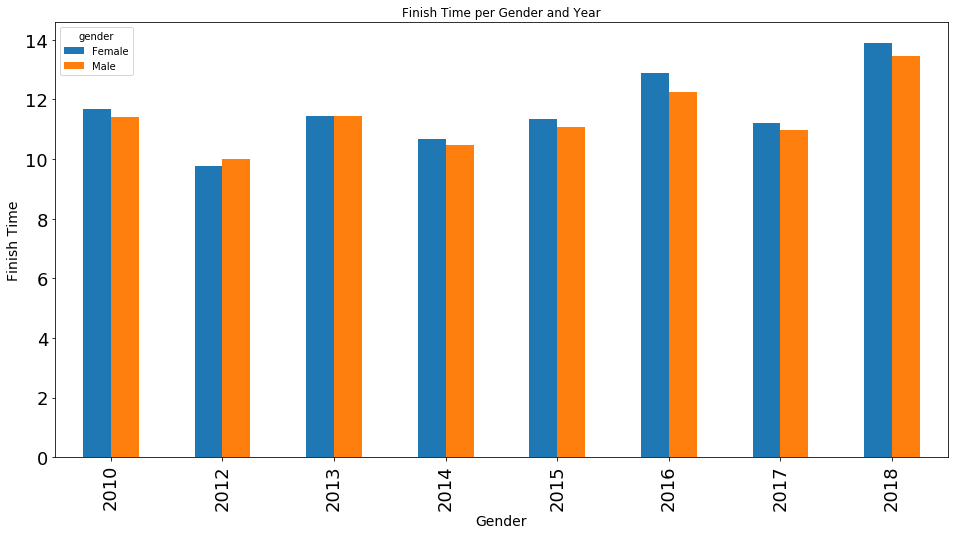

In [18]:
gen = df.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot.bar(figsize=(16, 8), title='Finish Time per Gender and Year', fontsize=18)
ax.set_ylabel('Finish Time', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

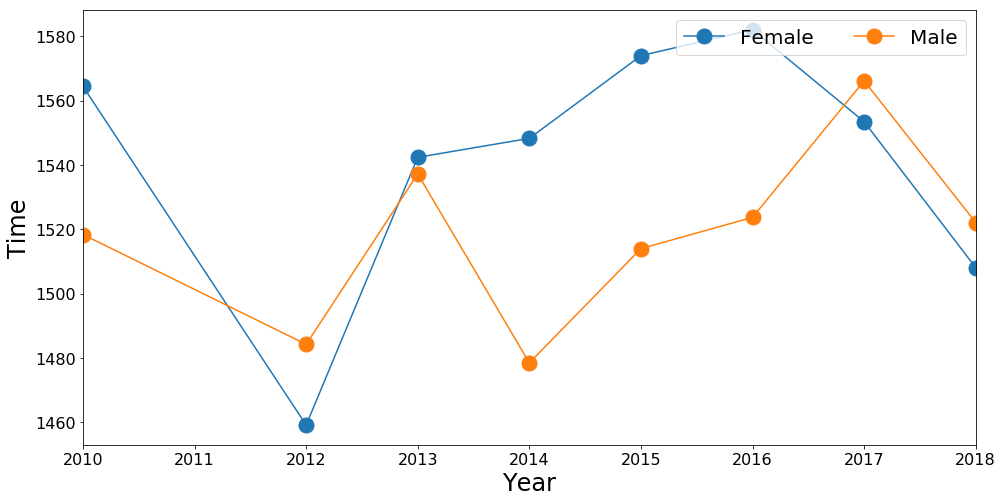

In [19]:
gen = df.groupby(['Year', 'gender'])['time'].mean().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Time', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='upper right', fontsize=20)

In [20]:
df.groupby(['Year', 'category'])['time'].mean().unstack()

category,Masters Men 1 (40-49),Masters Men 2 (50-59),Masters Men 3 (60-69),Masters Men 4 (70-79),Masters Women 1 (40-49),Masters Women 2 (50-59),Masters Women 3 (60-69),Masters Women 4 (70-79),Senior Men (23-39),Senior Women (23-39),Youth Men (20-22),Youth Women (20-22)
Year,,,,,,,,,,,,
2010,1511.616667,1608.405357,1688.710256,NaN,1553.322917,1688.304167,NaN,NaN,1458.145068,1527.632692,1344.075000,1794.583333
2012,1516.086700,1605.824359,1689.994444,NaN,1538.524561,1540.238889,1756.116667,NaN,1400.915670,1388.510920,NaN,NaN
2013,1560.633516,1590.670175,1729.850000,NaN,1603.934211,1578.354762,1657.116667,NaN,1469.325581,1480.861333,1643.138889,NaN
2014,1485.424752,1614.891228,1684.821429,NaN,1600.648551,1529.752778,NaN,NaN,1396.958065,1506.130769,1730.066667,NaN
2015,1559.022840,1653.521717,1736.793333,NaN,1572.085333,1644.818519,NaN,1799.9,1404.058958,1512.751961,937.916667,1796.566667
2016,1547.660227,1624.287281,1733.850000,NaN,1628.996795,1648.115152,NaN,NaN,1433.199375,1507.051282,939.600000,NaN
2017,1580.879693,1656.224444,1738.083333,NaN,1595.205556,1518.837500,1799.850000,NaN,1509.412447,1523.994667,1363.866667,NaN
2018,1555.687593,1604.748780,1693.258333,1749.7,1627.798413,1624.587500,1432.933333,NaN,1436.966151,1431.163636,1644.516667,1139.750000


#  Correlation with finish time

We find stages with the highest correlation with finish times

In [21]:
df1 = df.drop(['Unnamed: 0',  'Year', 'bib', 'rank', 'name_mask', 'gender', 'category', 'nationality', 'runner_age'], axis=1)

In [22]:
df1.head()

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,6.265060,NaN,5.393258,NaN,4.347826,NaN,NaN,5.894737,NaN,4.545455,...,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,6.204819,NaN,5.842697,NaN,4.782609,NaN,NaN,6.105263,NaN,4.696970,...,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,6.325301,NaN,6.067416,NaN,4.927536,NaN,NaN,6.631579,NaN,5.454545,...,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,6.385542,NaN,6.179775,NaN,4.927536,NaN,NaN,6.736842,NaN,5.000000,...,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,6.566265,NaN,6.292135,NaN,5.000000,NaN,NaN,6.947368,NaN,5.000000,...,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802


In [23]:
corr = df1.corr()
corr

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,...,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
Start to Lyon Ridge,1.000000,NaN,0.780527,NaN,0.706352,NaN,0.632456,0.536762,0.481233,0.410848,...,0.273787,0.215632,0.180974,0.221175,0.265251,NaN,0.142963,0.079869,0.783471,0.464043
Start to Talbot Creek,NaN,1.000000,NaN,0.858167,NaN,0.496541,NaN,0.795060,NaN,0.580200,...,0.217634,NaN,0.315676,NaN,NaN,NaN,0.281543,0.166891,0.842815,0.619449
Lyon Ridge to Red Star Ridge,0.780527,NaN,1.000000,NaN,0.361206,NaN,0.322893,0.227572,0.238223,0.287302,...,0.102520,0.175498,0.050350,0.204671,0.109506,NaN,0.067158,0.063843,0.344458,0.379008
Talbot Creek to Poppy Trailhead,NaN,0.858167,NaN,1.000000,NaN,0.432901,NaN,0.376714,NaN,0.250564,...,0.127082,NaN,0.131404,NaN,-0.391925,NaN,0.136712,0.056588,0.449735,0.410174
Red Star Ridge to Duncan Canyon,0.706352,NaN,0.361206,NaN,1.000000,NaN,0.581114,0.645124,0.395969,0.466917,...,0.199101,0.242537,0.128613,0.261656,0.204279,NaN,0.121912,0.097712,0.663550,0.419836
Poppy Trailhead to Duncan Canyon,NaN,0.496541,NaN,0.432901,NaN,1.000000,NaN,0.429509,NaN,0.347521,...,0.112423,NaN,0.270423,NaN,-0.083045,NaN,0.220182,0.043765,0.445771,0.467728
Duncan Canyon to Mosquito Ridge,0.632456,NaN,0.322893,NaN,0.581114,NaN,1.000000,NaN,0.417572,NaN,...,0.140004,NaN,0.091661,NaN,0.233847,NaN,0.168963,0.127692,0.587329,0.534880
Duncan Canyon to Robinson Flat,0.536762,0.795060,0.227572,0.376714,0.645124,0.429509,NaN,1.000000,NaN,0.437139,...,0.241795,0.129163,0.231456,0.130635,0.157890,NaN,0.092154,0.094435,0.576678,0.432181
Mosquito Ridge to Millers Defeat,0.481233,NaN,0.238223,NaN,0.395969,NaN,0.417572,NaN,1.000000,NaN,...,0.179954,NaN,0.113566,NaN,0.267641,NaN,0.239461,0.179973,0.619171,0.552443
Robinson Flat to Millers Defeat,0.410848,0.580200,0.287302,0.250564,0.466917,0.347521,NaN,0.437139,NaN,1.000000,...,0.289060,0.156946,0.264834,0.135552,0.297732,NaN,0.109345,0.056558,0.505830,0.339516


In [24]:
corr['time'].sort_values(ascending = False).head(10)

time                            1.000000
Dardanelles to Peachstone       0.920751
Foresthill to Dardanelles       0.878186
Foresthill to Peachstone        0.869648
Start to Talbot Creek           0.842815
Peachstone to Fords Bar         0.793821
AVG_Pace                        0.792782
Michigan Bluff to Foresthill    0.789782
Start to Lyon Ridge             0.783471
Peachstone to Rucky Chucky      0.738635
Name: time, dtype: float64

In [25]:
corr['time'].sort_values().head(10)

Robie Point to Finish                0.195564
Rucky Chucky to Green Gate           0.228125
Browns Bar to Highway 49             0.299327
Lyon Ridge to Red Star Ridge         0.344458
El Dorado Creek to Michigan Bluff    0.356828
No Hands Bridge to Robie Point       0.370305
Auburn Lake Trails to Browns Bar     0.444619
Poppy Trailhead to Duncan Canyon     0.445771
Talbot Creek to Poppy Trailhead      0.449735
Millers Defeat to Dusty Corners      0.457064
Name: time, dtype: float64

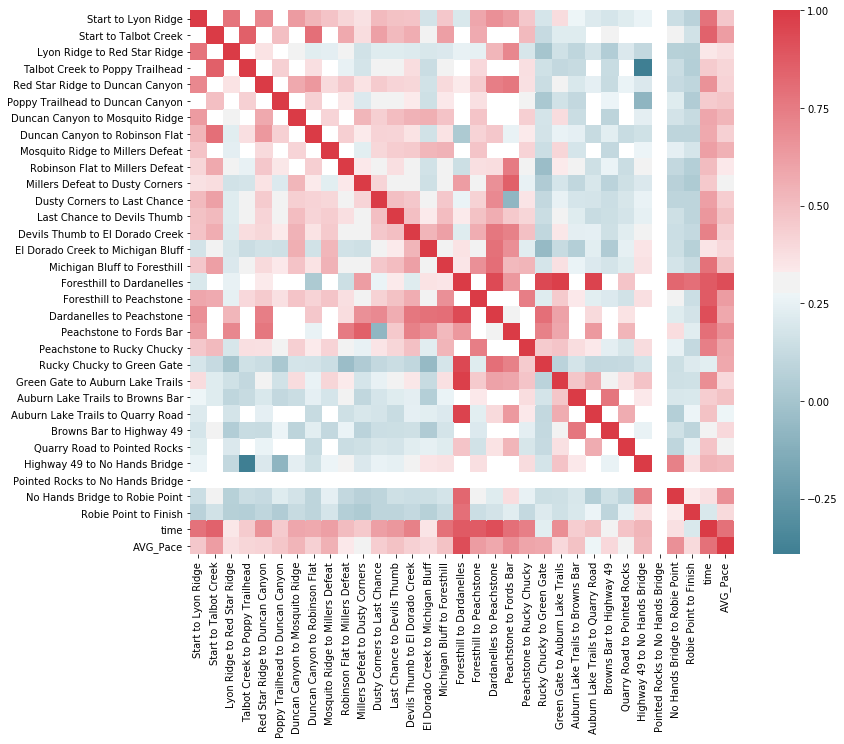

In [26]:


f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

The same heat map was created for Western States. The least correlated
stage to the finish time is actually the ultimate stage, Robie Point to Finish. This is a short stage
of around 3km so it is probably not too much of a shock that it is not that relevant to finish
time. The stages Michigan Bluff to Rocky Chucky are very highly correlated to finish time. These
stages take place just after the mid-point of the race. It would be advised to target this part of
the race as a Western State runner. According to the heat map, the pace of these stages have a
greater influence on the finish time that most of the other stages. Because these stages are all consecutive, means this section of the race is pivotal to running a successful Western States.


# Overall drop out rates

The overall drop out rates are found for the Western States

In [27]:
full = len(df.time)
finisher = df.time.count()
drop = full - finisher
print('Starters:', full)
print('Finishers:', finisher)
print('Drop outs:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Starters: 3021
Finishers: 2293
Drop outs: 2293
Percentage to finish:  75.9020191989
Percentage to drop out 24.0979808011


# Drop out numbers 2017

In [28]:
df2017 = df.loc[df['Year'] == 2017]

In [29]:
full = len(df2017.time)
finisher = df2017.time.count()
drop = full - finisher
print('Starters:', full)
print('Finishers:', finisher)
print('Drop outs:', drop)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Starters: 368
Finishers: 246
Drop outs: 122
Percentage to finish:  66.847826087
Percentage to drop out 33.152173913


In [30]:
df2017 = df2017.dropna(axis=1, how='all')

In [31]:
df2017.count()

Unnamed: 0                           368
Year                                 368
bib                                  368
name_mask                            368
gender                               368
category                             368
runner_age                           368
rank                                 368
nationality                          368
Start to Lyon Ridge                  353
Lyon Ridge to Red Star Ridge         355
Red Star Ridge to Duncan Canyon      335
Duncan Canyon to Robinson Flat       332
Robinson Flat to Millers Defeat      318
Millers Defeat to Dusty Corners      317
Dusty Corners to Last Chance         315
Last Chance to Devils Thumb          315
Devils Thumb to El Dorado Creek      301
El Dorado Creek to Michigan Bluff    296
Michigan Bluff to Foresthill         290
Foresthill to Peachstone             261
Peachstone to Rucky Chucky           271
Rucky Chucky to Green Gate           252
Green Gate to Auburn Lake Trails     253
Auburn Lake Trai

In [32]:
stage17 = df2017.filter(like = 'to')

In [33]:
stage17.count()

Start to Lyon Ridge                  353
Lyon Ridge to Red Star Ridge         355
Red Star Ridge to Duncan Canyon      335
Duncan Canyon to Robinson Flat       332
Robinson Flat to Millers Defeat      318
Millers Defeat to Dusty Corners      317
Dusty Corners to Last Chance         315
Last Chance to Devils Thumb          315
Devils Thumb to El Dorado Creek      301
El Dorado Creek to Michigan Bluff    296
Michigan Bluff to Foresthill         290
Foresthill to Peachstone             261
Peachstone to Rucky Chucky           271
Rucky Chucky to Green Gate           252
Green Gate to Auburn Lake Trails     253
Auburn Lake Trails to Quarry Road    242
Quarry Road to Pointed Rocks         241
No Hands Bridge to Robie Point       229
Robie Point to Finish                237
dtype: int64

In [34]:
stage17count = stage17.count()

In [35]:
stage17count.diff()

Start to Lyon Ridge                   NaN
Lyon Ridge to Red Star Ridge          2.0
Red Star Ridge to Duncan Canyon     -20.0
Duncan Canyon to Robinson Flat       -3.0
Robinson Flat to Millers Defeat     -14.0
Millers Defeat to Dusty Corners      -1.0
Dusty Corners to Last Chance         -2.0
Last Chance to Devils Thumb           0.0
Devils Thumb to El Dorado Creek     -14.0
El Dorado Creek to Michigan Bluff    -5.0
Michigan Bluff to Foresthill         -6.0
Foresthill to Peachstone            -29.0
Peachstone to Rucky Chucky           10.0
Rucky Chucky to Green Gate          -19.0
Green Gate to Auburn Lake Trails      1.0
Auburn Lake Trails to Quarry Road   -11.0
Quarry Road to Pointed Rocks         -1.0
No Hands Bridge to Robie Point      -12.0
Robie Point to Finish                 8.0
dtype: float64

In [36]:
s17 = stage17count.diff()
s17.sort_values()

Foresthill to Peachstone            -29.0
Red Star Ridge to Duncan Canyon     -20.0
Rucky Chucky to Green Gate          -19.0
Robinson Flat to Millers Defeat     -14.0
Devils Thumb to El Dorado Creek     -14.0
No Hands Bridge to Robie Point      -12.0
Auburn Lake Trails to Quarry Road   -11.0
Michigan Bluff to Foresthill         -6.0
El Dorado Creek to Michigan Bluff    -5.0
Duncan Canyon to Robinson Flat       -3.0
Dusty Corners to Last Chance         -2.0
Millers Defeat to Dusty Corners      -1.0
Quarry Road to Pointed Rocks         -1.0
Last Chance to Devils Thumb           0.0
Green Gate to Auburn Lake Trails      1.0
Lyon Ridge to Red Star Ridge          2.0
Robie Point to Finish                 8.0
Peachstone to Rucky Chucky           10.0
Start to Lyon Ridge                   NaN
dtype: float64

In [37]:
d17 = s17.sort_values()

#  2016 Drop out numbers

In [38]:
df2016 = df.loc[df['Year'] == 2016]

In [39]:
full = len(df2016.time)
finisher = df2016.time.count()
drop = full-finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 73
Starters: 352
Finishers: 279
Percentage to finish:  79.2613636364
Percentage to drop out 20.7386363636


In [40]:
df2016 = df2016.dropna(axis=1, how='all')
stage16 = df2016.filter(like = 'to')
stage16count = stage16.count()
s16 = stage16count.diff()
s16.count

<bound method Series.count of Start to Lyon Ridge                    NaN
Lyon Ridge to Red Star Ridge          37.0
Red Star Ridge to Duncan Canyon        0.0
Duncan Canyon to Robinson Flat        -3.0
Robinson Flat to Millers Defeat      -10.0
Millers Defeat to Dusty Corners      -39.0
Dusty Corners to Last Chance          23.0
Last Chance to Devils Thumb           12.0
Devils Thumb to El Dorado Creek     -331.0
El Dorado Creek to Michigan Bluff    318.0
Michigan Bluff to Foresthill          -4.0
Foresthill to Peachstone             -14.0
Peachstone to Rucky Chucky            -3.0
Rucky Chucky to Green Gate            -9.0
Green Gate to Auburn Lake Trails      -3.0
Auburn Lake Trails to Browns Bar       0.0
Browns Bar to Highway 49               0.0
Highway 49 to No Hands Bridge       -287.0
No Hands Bridge to Robie Point       277.0
Robie Point to Finish                  1.0
dtype: float64>

In [41]:
s16.sort_values()

Devils Thumb to El Dorado Creek     -331.0
Highway 49 to No Hands Bridge       -287.0
Millers Defeat to Dusty Corners      -39.0
Foresthill to Peachstone             -14.0
Robinson Flat to Millers Defeat      -10.0
Rucky Chucky to Green Gate            -9.0
Michigan Bluff to Foresthill          -4.0
Duncan Canyon to Robinson Flat        -3.0
Green Gate to Auburn Lake Trails      -3.0
Peachstone to Rucky Chucky            -3.0
Red Star Ridge to Duncan Canyon        0.0
Browns Bar to Highway 49               0.0
Auburn Lake Trails to Browns Bar       0.0
Robie Point to Finish                  1.0
Last Chance to Devils Thumb           12.0
Dusty Corners to Last Chance          23.0
Lyon Ridge to Red Star Ridge          37.0
No Hands Bridge to Robie Point       277.0
El Dorado Creek to Michigan Bluff    318.0
Start to Lyon Ridge                    NaN
dtype: float64

In [42]:
d16 = s16.sort_values()

#  2015 drop out numbers

In [43]:
df2015 = df.loc[df['Year'] == 2015]

In [44]:
full = len(df2015.time)
finisher = df2015.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 117
Starters: 370
Finishers: 253
Percentage to finish:  68.3783783784
Percentage to drop out 31.6216216216


In [45]:
df2015 = df2015.dropna(axis=1, how='all')
stage15 = df2015.filter(like = 'to')
stage15count = stage15.count()
s15 = stage15count.diff()
s15.count

<bound method Series.count of Start to Lyon Ridge                   NaN
Lyon Ridge to Red Star Ridge         21.0
Red Star Ridge to Duncan Canyon      -4.0
Duncan Canyon to Robinson Flat        0.0
Robinson Flat to Millers Defeat     -45.0
Millers Defeat to Dusty Corners      14.0
Dusty Corners to Last Chance        -18.0
Last Chance to Devils Thumb          12.0
Devils Thumb to El Dorado Creek     -17.0
El Dorado Creek to Michigan Bluff     1.0
Michigan Bluff to Foresthill        -20.0
Foresthill to Peachstone            -16.0
Peachstone to Rucky Chucky          -13.0
Rucky Chucky to Green Gate           -5.0
Green Gate to Auburn Lake Trails     -1.0
Auburn Lake Trails to Browns Bar      0.0
Browns Bar to Highway 49             -1.0
No Hands Bridge to Robie Point       -6.0
Robie Point to Finish                 5.0
dtype: float64>

In [46]:
s15.sort_values()

Robinson Flat to Millers Defeat     -45.0
Michigan Bluff to Foresthill        -20.0
Dusty Corners to Last Chance        -18.0
Devils Thumb to El Dorado Creek     -17.0
Foresthill to Peachstone            -16.0
Peachstone to Rucky Chucky          -13.0
No Hands Bridge to Robie Point       -6.0
Rucky Chucky to Green Gate           -5.0
Red Star Ridge to Duncan Canyon      -4.0
Browns Bar to Highway 49             -1.0
Green Gate to Auburn Lake Trails     -1.0
Duncan Canyon to Robinson Flat        0.0
Auburn Lake Trails to Browns Bar      0.0
El Dorado Creek to Michigan Bluff     1.0
Robie Point to Finish                 5.0
Last Chance to Devils Thumb          12.0
Millers Defeat to Dusty Corners      14.0
Lyon Ridge to Red Star Ridge         21.0
Start to Lyon Ridge                   NaN
dtype: float64

In [47]:
d15 = s15.sort_values()

# 2014 drop out

In [48]:
df2014 = df.loc[df['Year'] == 2014]

In [49]:
full = len(df2014.time)
finisher = df2014.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 80
Starters: 375
Finishers: 295
Percentage to finish:  78.6666666667
Percentage to drop out 21.3333333333


In [50]:
df2014 = df2014.dropna(axis=1, how='all')
stage14 = df2014.filter(like = 'to')
stage14count = stage14.count()
s14 = stage14count.diff()
s14.count

<bound method Series.count of Start to Lyon Ridge                   NaN
Lyon Ridge to Red Star Ridge          6.0
Red Star Ridge to Duncan Canyon      -3.0
Duncan Canyon to Robinson Flat       17.0
Robinson Flat to Millers Defeat     -14.0
Millers Defeat to Dusty Corners     -24.0
Dusty Corners to Last Chance         -8.0
Last Chance to Devils Thumb          19.0
Devils Thumb to El Dorado Creek       4.0
El Dorado Creek to Michigan Bluff     1.0
Michigan Bluff to Foresthill        -13.0
Foresthill to Peachstone            -15.0
Peachstone to Rucky Chucky          -37.0
Rucky Chucky to Green Gate           24.0
Green Gate to Auburn Lake Trails     -1.0
Auburn Lake Trails to Browns Bar     -9.0
Browns Bar to Highway 49              0.0
Highway 49 to No Hands Bridge       -10.0
No Hands Bridge to Robie Point        2.0
Robie Point to Finish                 6.0
dtype: float64>

In [51]:
s14.sort_values().head()

Peachstone to Rucky Chucky        -37.0
Millers Defeat to Dusty Corners   -24.0
Foresthill to Peachstone          -15.0
Robinson Flat to Millers Defeat   -14.0
Michigan Bluff to Foresthill      -13.0
dtype: float64

In [52]:
d14 = s14.sort_values()

#  2013 drop out

In [53]:
df2013 = df.loc[df['Year'] == 2013]

In [54]:
full = len(df2013.time)
finisher = df2013.time.count()
drop = full - finisher
print('Drop outs:', drop)
print('Starters:', full)
print('Finishers:', finisher)
finPC = (finisher / full) * 100
dropPC = (drop / full) * 100
print('Percentage to finish: ', finPC)
print('Percentage to drop out', dropPC)

Drop outs: 106
Starters: 383
Finishers: 277
Percentage to finish:  72.3237597911
Percentage to drop out 27.6762402089


In [55]:

df2013 = df2013.dropna(axis=1, how='all')
stage13 = df2013.filter(like = 'to')
stage13count = stage13.count()
s13 = stage13count.diff()
s13.count

<bound method Series.count of Start to Lyon Ridge                    NaN
Lyon Ridge to Red Star Ridge          13.0
Red Star Ridge to Duncan Canyon       -6.0
Duncan Canyon to Robinson Flat        16.0
Robinson Flat to Millers Defeat      -33.0
Millers Defeat to Dusty Corners       11.0
Dusty Corners to Last Chance          17.0
Last Chance to Devils Thumb           -8.0
Devils Thumb to El Dorado Creek      -10.0
El Dorado Creek to Michigan Bluff      2.0
Michigan Bluff to Foresthill         -19.0
Foresthill to Peachstone             -12.0
Peachstone to Rucky Chucky           -12.0
Rucky Chucky to Green Gate           -10.0
Green Gate to Auburn Lake Trails      -6.0
Auburn Lake Trails to Browns Bar     -16.0
Browns Bar to Highway 49               6.0
Highway 49 to No Hands Bridge       -278.0
No Hands Bridge to Robie Point       275.0
Robie Point to Finish                 -1.0
dtype: float64>

In [56]:
s13.sort_values().head()

Highway 49 to No Hands Bridge      -278.0
Robinson Flat to Millers Defeat     -33.0
Michigan Bluff to Foresthill        -19.0
Auburn Lake Trails to Browns Bar    -16.0
Peachstone to Rucky Chucky          -12.0
dtype: float64

In [57]:
d13 = s13.sort_values()

Obviously a very tough year for the race. This is the only year where more people dropped out than finished. 

In [58]:
d_all = d17.append([d16, d15, d14, d13])


In [59]:
d_all.sort_values()

Devils Thumb to El Dorado Creek     -331.0
Highway 49 to No Hands Bridge       -287.0
Highway 49 to No Hands Bridge       -278.0
Robinson Flat to Millers Defeat      -45.0
Millers Defeat to Dusty Corners      -39.0
Peachstone to Rucky Chucky           -37.0
Robinson Flat to Millers Defeat      -33.0
Foresthill to Peachstone             -29.0
Millers Defeat to Dusty Corners      -24.0
Michigan Bluff to Foresthill         -20.0
Red Star Ridge to Duncan Canyon      -20.0
Rucky Chucky to Green Gate           -19.0
Michigan Bluff to Foresthill         -19.0
Dusty Corners to Last Chance         -18.0
Devils Thumb to El Dorado Creek      -17.0
Foresthill to Peachstone             -16.0
Auburn Lake Trails to Browns Bar     -16.0
Foresthill to Peachstone             -15.0
Robinson Flat to Millers Defeat      -14.0
Devils Thumb to El Dorado Creek      -14.0
Foresthill to Peachstone             -14.0
Robinson Flat to Millers Defeat      -14.0
Michigan Bluff to Foresthill         -13.0
Peachstone 

# Completion Rate

The yearly completion rate is found

In [60]:
d = {'Year': [2013, 2014, 2015, 2016, 2017], 
     'Finishers': [277, 295, 253, 279, 246],
    'Non-Finishers': [106, 80, 117, 73, 122]}
comp = pd.DataFrame(data=d)
comp = comp.set_index('Year')
comp

,Finishers,Non-Finishers
Year,,
2013,277,106
2014,295,80
2015,253,117
2016,279,73
2017,246,122


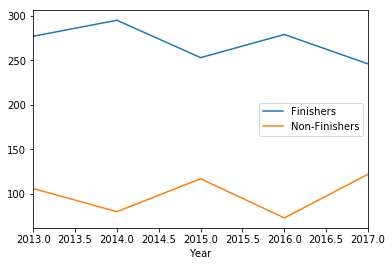

In [61]:
comp.plot()

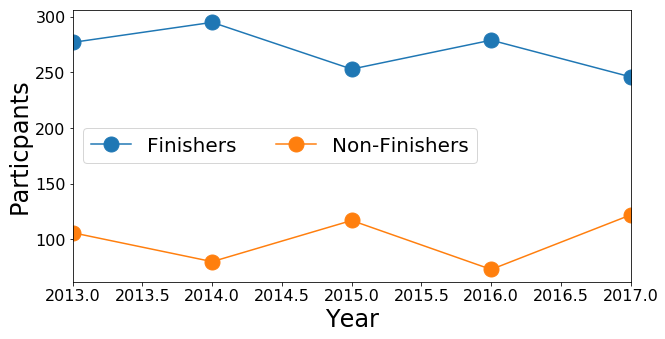

In [62]:
ax = comp.plot(figsize=(10, 5), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Finishers', 'Non-Finishers'], frameon=True, ncol=2, loc='center left', fontsize=20)

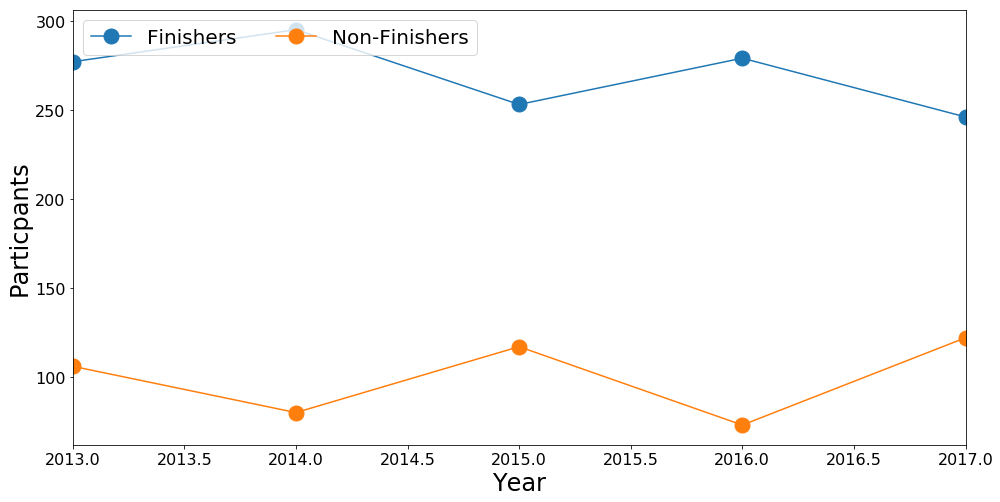

In [63]:
ax = comp.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Particpants', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Finishers', 'Non-Finishers'], frameon=True, ncol=2, loc='upper left', fontsize=20)

In [64]:
comp.index

Int64Index([2013, 2014, 2015, 2016, 2017], dtype='int64', name='Year')

# Starts

Need to examine the start stages as we did with the UTMB

In [65]:
df2017.iloc[0, 10:15]

Lyon Ridge to Red Star Ridge       6.04682
Red Star Ridge to Duncan Canyon    5.14493
Duncan Canyon to Robinson Flat     6.31579
Robinson Flat to Millers Defeat    4.69697
Millers Defeat to Dusty Corners    4.82143
Name: 111, dtype: object

In [66]:
df2016.iloc[0, 10:15]

Lyon Ridge to Red Star Ridge       5.69288
Red Star Ridge to Duncan Canyon    4.43841
Duncan Canyon to Robinson Flat     6.21053
Robinson Flat to Millers Defeat    6.06061
Millers Defeat to Dusty Corners    4.82143
Name: 209, dtype: object

In [67]:
df2015.iloc[0, 10:15]

Lyon Ridge to Red Star Ridge        5.8427
Red Star Ridge to Duncan Canyon    4.63768
Duncan Canyon to Robinson Flat           6
Robinson Flat to Millers Defeat    5.75758
Millers Defeat to Dusty Corners    4.46429
Name: 306, dtype: object

In [68]:
df2014.iloc[0, 10:15]

Lyon Ridge to Red Star Ridge       5.95506
Red Star Ridge to Duncan Canyon    4.71014
Duncan Canyon to Robinson Flat     6.10526
Robinson Flat to Millers Defeat    6.21212
Millers Defeat to Dusty Corners    4.46429
Name: 412, dtype: object

In [69]:
df2013.iloc[0, 10:15]

Lyon Ridge to Red Star Ridge       5.95506
Red Star Ridge to Duncan Canyon    4.56522
Duncan Canyon to Robinson Flat     6.10526
Robinson Flat to Millers Defeat    6.21212
Millers Defeat to Dusty Corners    5.35714
Name: 521, dtype: object

We'll focus on the starts from the years 2011 to 2017, as they have the exact same starting stages and are easy to compare.

In [70]:
df = df.drop(df[(df.Year == 2008)].index)

In [71]:
df = df.drop(df[(df.Year == 2009)].index)

In [72]:
gender = df['gender']

In [73]:
df = df[['Lyon Ridge to Red Star Ridge', 'Red Star Ridge to Duncan Canyon', 'Duncan Canyon to Robinson Flat', 'Robinson Flat to Millers Defeat', 
         'Millers Defeat to Dusty Corners', 'AVG_Pace','time', 'rank'
        ]]

In [74]:
df.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,AVG_Pace,time,rank
0,5.393258,4.347826,5.894737,4.545455,4.464286,6.448759,870.066667,1.0
1,5.842697,4.782609,6.105263,4.696970,4.821429,7.314765,954.883333,2.0
2,6.067416,4.927536,6.631579,5.454545,NaN,7.689034,968.983333,3.0
3,6.179775,4.927536,6.736842,5.000000,NaN,7.774000,983.533333,4.0
4,6.292135,5.000000,6.947368,5.000000,5.178571,7.629802,1014.383333,6.0


In [75]:
df = df.dropna(axis=0, how='any')

In [76]:
times = df.filter(like='time')
avg = df.filter(like='AVG')
rank = df.filter(like='rank')

In [77]:
df = df.loc[:, 'Lyon Ridge to Red Star Ridge':'Millers Defeat to Dusty Corners'].div(df['AVG_Pace'], axis=0)

In [78]:
df = df.join(avg)

In [79]:
df = df.join(times)

In [80]:
df['Start_Pace'] = df.filter(like='to').mean(axis = 1)

In [81]:
df['Start_Pace'].sort_values().head()

69      0.383565
922     0.385252
68      0.410657
2679    0.440173
1835    0.454550
Name: Start_Pace, dtype: float64

In [82]:
df['Start_Pace'].sort_values(ascending= False).head()

1349    1.181128
2551    1.163926
486     1.118366
1444    1.111196
441     1.104504
Name: Start_Pace, dtype: float64

In [83]:
df['Fast'] = df['Start_Pace'] < (df['AVG_Pace'] * 0.9)

In [84]:
df

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,AVG_Pace,time,Start_Pace,Fast
0,0.836325,0.674211,0.914088,0.704857,0.692270,6.448759,870.066667,0.764350,True
1,0.798754,0.653829,0.834649,0.642122,0.659136,7.314765,954.883333,0.717698,True
4,0.824679,0.655325,0.910557,0.655325,0.678729,7.629802,1014.383333,0.744923,True
6,0.784378,0.637018,0.857311,0.685560,0.646386,7.735322,1019.283333,0.722131,True
7,0.695118,0.578716,0.781459,0.664671,0.622672,8.890250,1040.150000,0.668527,True
8,0.694007,0.553377,0.803853,0.612562,0.561515,8.904480,1046.666667,0.645063,True
9,0.692095,0.568083,0.825216,0.780561,0.619964,8.929083,1053.166667,0.697184,True
13,0.580836,0.492118,0.640178,0.491450,0.488708,9.865672,1114.083333,0.538658,True
14,0.628780,0.499655,0.715296,0.529938,0.535345,10.006897,1140.983333,0.581803,True
15,0.604708,0.489264,0.690119,0.548568,0.524211,10.219437,1167.366667,0.571374,True


In [85]:
df['Slow'] = df['Start_Pace'] > (df['AVG_Pace'] * 1.1)

In [86]:
df_fast = df.loc[df['Fast'] == True]

In [87]:
df_slow = df.loc[df['Slow'] == True]

# Comparing start pace to average pace

Compares the first five stages with the average pace...

In [88]:
df['rel_AVG_Pace'] = df.loc[:, 'AVG_Pace'].div(df['AVG_Pace'], axis=0)

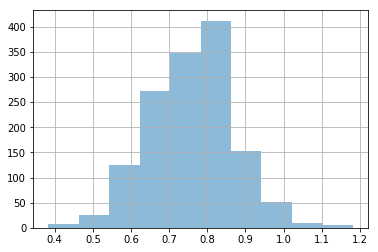

In [89]:
df['Start_Pace'].hist(alpha = 0.5)
#df['rel_AVG_Pace'].hist(alpha = 0.5)

#####  First stage vs average

In [90]:
df = df[['Lyon Ridge to Red Star Ridge', 'Red Star Ridge to Duncan Canyon', 'Duncan Canyon to Robinson Flat', 'Robinson Flat to Millers Defeat', 
         'Millers Defeat to Dusty Corners', 'AVG_Pace','time', 
        ]]

In [91]:
df['Start_Pace'] = df.filter(like='to').mean(axis = 1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df2 = df[['Lyon Ridge to Red Star Ridge', 'AVG_Pace','time'
        ]]

In [93]:
df2 = df2.dropna(axis=0, how='any')

In [94]:
df2['Start_Pace'] = df2.filter(like='to').mean(axis = 1)

In [95]:
df2['Start_Pace'].sort_values().head()

69      0.157005
68      0.283859
938     0.287413
930     0.333841
1835    0.334644
Name: Start_Pace, dtype: float64

In [96]:
df2['Start_Pace'].sort_values(ascending= False).head()

1349    2.520296
2551    2.470228
441     2.385328
2960    2.337228
2761    2.296080
Name: Start_Pace, dtype: float64

In [97]:
df2.head()

,Lyon Ridge to Red Star Ridge,AVG_Pace,time,Start_Pace
0,0.836325,6.448759,870.066667,0.836325
1,0.798754,7.314765,954.883333,0.798754
4,0.824679,7.629802,1014.383333,0.824679
6,0.784378,7.735322,1019.283333,0.784378
7,0.695118,8.890250,1040.150000,0.695118


In [98]:
df2['Fast'] = df2['Start_Pace'] < (df2['AVG_Pace'] * 0.9)

In [99]:
df2

,Lyon Ridge to Red Star Ridge,AVG_Pace,time,Start_Pace,Fast
0,0.836325,6.448759,870.066667,0.836325,True
1,0.798754,7.314765,954.883333,0.798754,True
4,0.824679,7.629802,1014.383333,0.824679,True
6,0.784378,7.735322,1019.283333,0.784378,True
7,0.695118,8.890250,1040.150000,0.695118,True
8,0.694007,8.904480,1046.666667,0.694007,True
9,0.692095,8.929083,1053.166667,0.692095,True
13,0.580836,9.865672,1114.083333,0.580836,True
14,0.628780,10.006897,1140.983333,0.628780,True
15,0.604708,10.219437,1167.366667,0.604708,True


In [100]:
df2['Slow'] = df2['Start_Pace'] > (df2['AVG_Pace'] * 1.1)

#####  First 2 stages vs average

In [101]:
df3 = df[['Lyon Ridge to Red Star Ridge', 'Red Star Ridge to Duncan Canyon', 'AVG_Pace','time'
        ]]

In [102]:
df3 = df3.dropna(axis=0, how='any')

In [103]:
df3['Start_Pace'] = df3.filter(like='to').mean(axis = 1)

In [104]:
df3['Start_Pace'].sort_values().head()

69      0.271651
68      0.322799
922     0.367107
1835    0.369655
930     0.371381
Name: Start_Pace, dtype: float64

In [105]:
df3['Start_Pace'].sort_values(ascending= False).head()

458     1.624998
1349    1.617380
2551    1.600453
441     1.505888
2960    1.496946
Name: Start_Pace, dtype: float64

In [106]:
df3.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,AVG_Pace,time,Start_Pace
0,0.836325,0.674211,6.448759,870.066667,0.755268
1,0.798754,0.653829,7.314765,954.883333,0.726292
4,0.824679,0.655325,7.629802,1014.383333,0.740002
6,0.784378,0.637018,7.735322,1019.283333,0.710698
7,0.695118,0.578716,8.890250,1040.150000,0.636917


In [107]:
df3['Fast'] = df3['Start_Pace'] < (df3['AVG_Pace'] * 0.9)

In [108]:
df3['Slow'] = df3['Start_Pace'] > (df3['AVG_Pace'] * 1.1)

#####  First 4 stages vs average

In [109]:
df5 = df[['Lyon Ridge to Red Star Ridge', 'Red Star Ridge to Duncan Canyon', 'Duncan Canyon to Robinson Flat', 'Robinson Flat to Millers Defeat', 
        'AVG_Pace','time'
        ]]

In [110]:
df5 = df5.dropna(axis=0, how='any')

In [111]:
df5['Start_Pace'] = df5.filter(like='to').mean(axis = 1)

In [112]:
df5['Start_Pace'].sort_values().head()

69      0.376690
922     0.392156
68      0.408447
2679    0.450054
1835    0.458604
Name: Start_Pace, dtype: float64

In [113]:
df5['Start_Pace'].sort_values(ascending= False).head()

1349    1.305848
2551    1.255661
441     1.214531
486     1.205092
2960    1.191298
Name: Start_Pace, dtype: float64

In [114]:
df5.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,AVG_Pace,time,Start_Pace
0,0.836325,0.674211,0.914088,0.704857,6.448759,870.066667,0.782370
1,0.798754,0.653829,0.834649,0.642122,7.314765,954.883333,0.732339
4,0.824679,0.655325,0.910557,0.655325,7.629802,1014.383333,0.761471
6,0.784378,0.637018,0.857311,0.685560,7.735322,1019.283333,0.741067
7,0.695118,0.578716,0.781459,0.664671,8.890250,1040.150000,0.679991


In [115]:
df5['Fast'] = df5['Start_Pace'] < (df5['AVG_Pace'] * 0.9)

In [116]:
df5['Slow'] = df5['Start_Pace'] > (df5['AVG_Pace'] * 1.1)

#####  First 3 stages vs average

In [117]:
df4 = df[['Lyon Ridge to Red Star Ridge', 'Red Star Ridge to Duncan Canyon', 'Duncan Canyon to Robinson Flat', 
        'AVG_Pace','time'
        ]]

In [118]:
df4 = df4.dropna(axis=0, how='any')

In [119]:
df4['Start_Pace'] = df4.filter(like='to').mean(axis = 1)

In [120]:
df4['Start_Pace'].sort_values().head()

69      0.355396
68      0.390357
922     0.398884
2679    0.457702
1835    0.459605
Name: Start_Pace, dtype: float64

In [121]:
df4['Start_Pace'].sort_values(ascending= False).head()

1349    1.411232
2551    1.356970
441     1.326456
2960    1.323154
2793    1.282298
Name: Start_Pace, dtype: float64

In [122]:
df4.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,AVG_Pace,time,Start_Pace
0,0.836325,0.674211,0.914088,6.448759,870.066667,0.808208
1,0.798754,0.653829,0.834649,7.314765,954.883333,0.762411
4,0.824679,0.655325,0.910557,7.629802,1014.383333,0.796854
6,0.784378,0.637018,0.857311,7.735322,1019.283333,0.759569
7,0.695118,0.578716,0.781459,8.890250,1040.150000,0.685098


In [123]:
df4['Fast'] = df4['Start_Pace'] < (df4['AVG_Pace'] * 0.9)

In [124]:
df4['Slow'] = df4['Start_Pace'] > (df4['AVG_Pace'] * 1.1)

# Comparing start pace to average pace

<function matplotlib.pyplot.show>

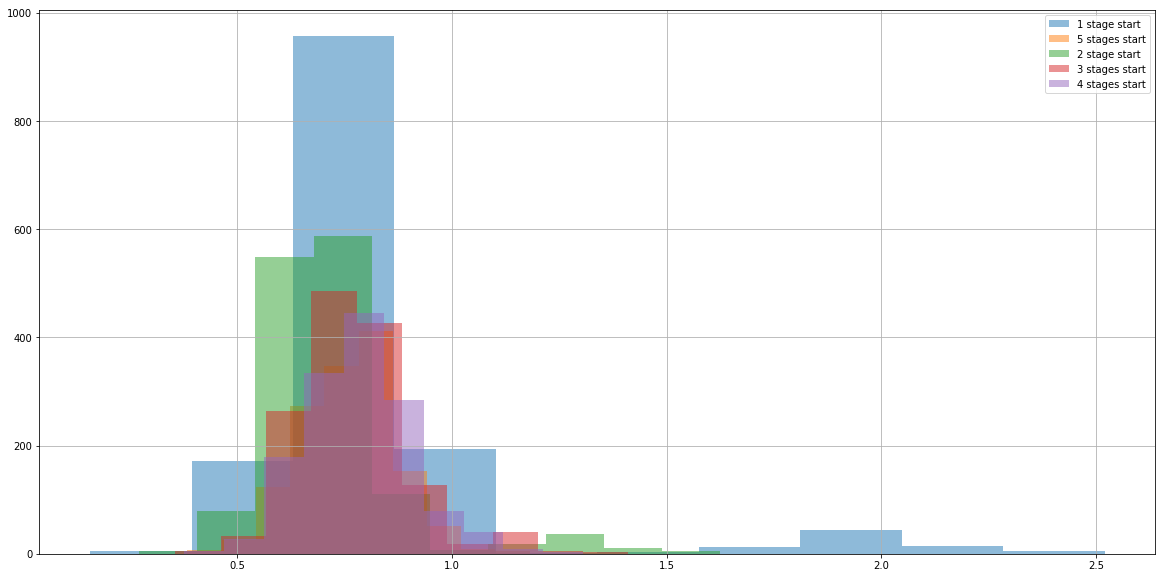

In [125]:
plt.figure(figsize = (20, 10))

df2['Start_Pace'].hist(alpha = 0.5)
df['Start_Pace'].hist(alpha = 0.5)
df3['Start_Pace'].hist(alpha = 0.5)
df4['Start_Pace'].hist(alpha = 0.5)
df5['Start_Pace'].hist(alpha = 0.5)

#df['rel_AVG_Pace'].hist(alpha = 0.5)

plt.legend(['1 stage start', '5 stages start', '2 stage start', '3 stages start', '4 stages start','Average pace' ])
plt.show

In [126]:
df.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,AVG_Pace,time,Start_Pace
0,0.836325,0.674211,0.914088,0.704857,0.692270,6.448759,870.066667,0.764350
1,0.798754,0.653829,0.834649,0.642122,0.659136,7.314765,954.883333,0.717698
4,0.824679,0.655325,0.910557,0.655325,0.678729,7.629802,1014.383333,0.744923
6,0.784378,0.637018,0.857311,0.685560,0.646386,7.735322,1019.283333,0.722131
7,0.695118,0.578716,0.781459,0.664671,0.622672,8.890250,1040.150000,0.668527


Text(0.5,0.98,'Average 1km pace per Category')

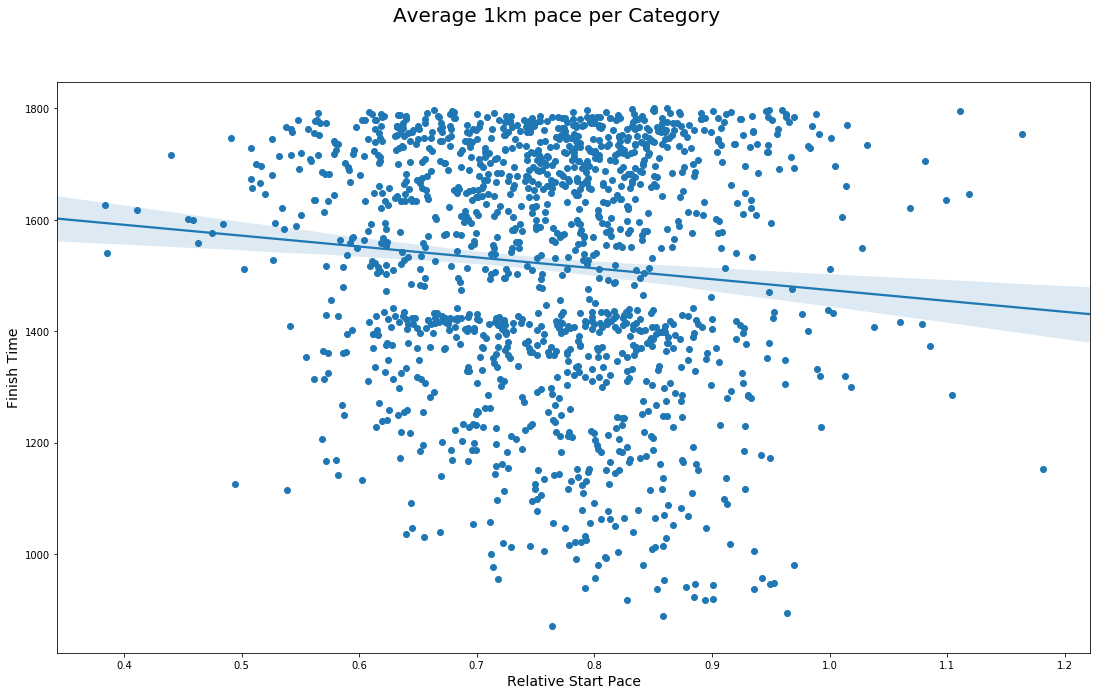

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot('Start_Pace', 'time', data=df, scatter_kws={'alpha': 1})
ax.set_ylabel('Finish Time', fontsize = 14)
ax.set_xlabel('Relative Start Pace', fontsize = 14)
fig.suptitle('Average 1km pace per Category', fontsize=20)

###  Start Pace vs Finish Time (5 Stages)

In [128]:
df = df.join(gender)

In [129]:
df.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,AVG_Pace,time,Start_Pace,gender
0,0.836325,0.674211,0.914088,0.704857,0.692270,6.448759,870.066667,0.764350,Male
1,0.798754,0.653829,0.834649,0.642122,0.659136,7.314765,954.883333,0.717698,Male
4,0.824679,0.655325,0.910557,0.655325,0.678729,7.629802,1014.383333,0.744923,Male
6,0.784378,0.637018,0.857311,0.685560,0.646386,7.735322,1019.283333,0.722131,Male
7,0.695118,0.578716,0.781459,0.664671,0.622672,8.890250,1040.150000,0.668527,Male


In [130]:
male = df.loc[df['gender'] == 'Male']
female = df.loc[df['gender'] == 'Female']

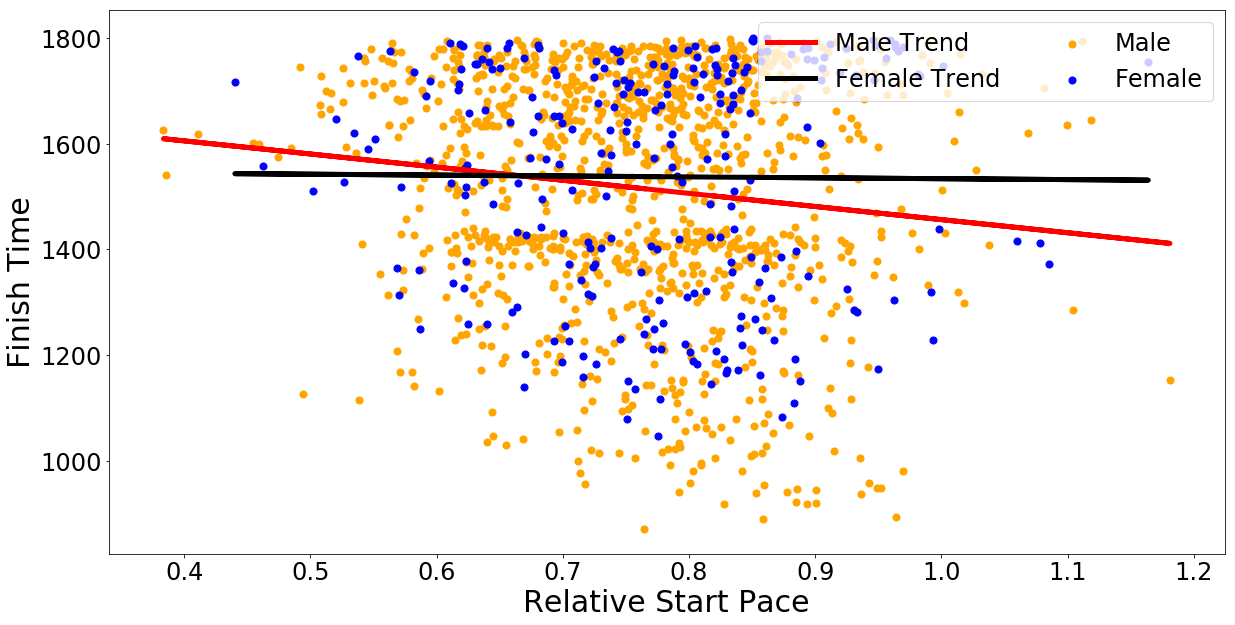

In [132]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 24, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 30)
ax1.set_xlabel('Relative Start Pace', fontsize = 30)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

The trends are similar for Western States, when compared to the UTMB. Again, most
runners start faster relative to their average pace. The elite runners run between 0.7 and 1 for
their first 5 stages, while there are runners who run more than twice as fast as their average pace
Page 23 of 41
and achieving slow finish times. For female runners, it does not seem to effect runners too much
if they start fast. Starting closer to their overall average pace does not seem to give them a better
finish times. Females who are starting at 0.6 relative to their average pace are still achieving good
finish times.

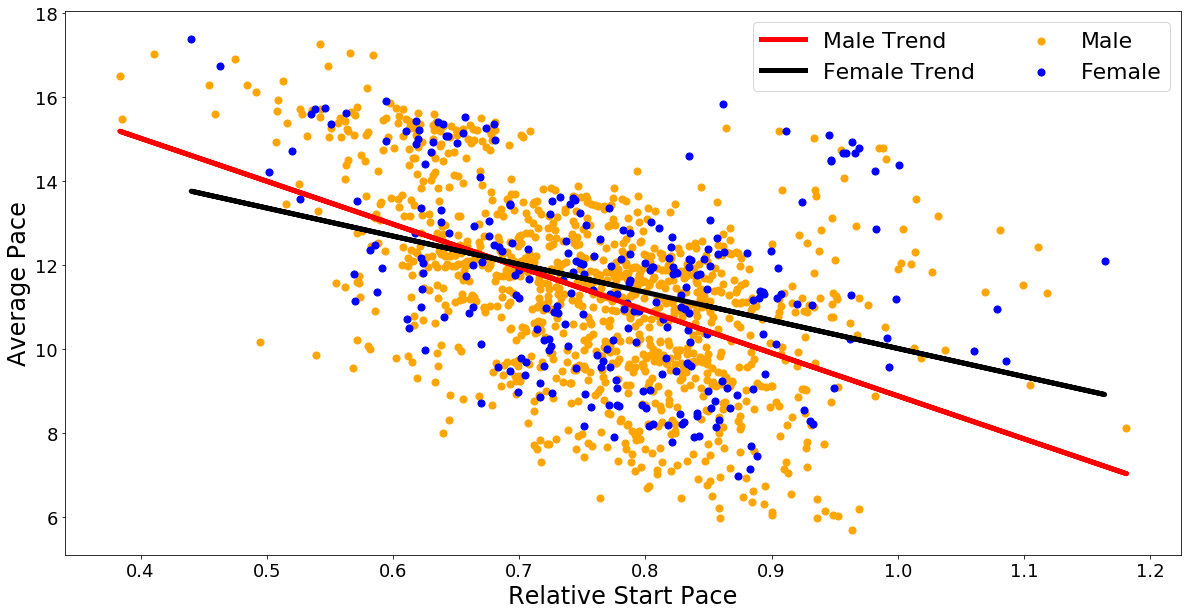

In [133]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='AVG_Pace', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['Start_Pace']
y = male['AVG_Pace']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='AVG_Pace', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['AVG_Pace']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Average Pace', fontsize = 24)
ax1.set_xlabel('Relative Start Pace', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

### Start Pace vs Finish Time (3 Stages)

In [134]:
df4 = df4.join(gender)

In [135]:
df4.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,AVG_Pace,time,Start_Pace,Fast,Slow,gender
0,0.836325,0.674211,0.914088,6.448759,870.066667,0.808208,True,False,Male
1,0.798754,0.653829,0.834649,7.314765,954.883333,0.762411,True,False,Male
4,0.824679,0.655325,0.910557,7.629802,1014.383333,0.796854,True,False,Male
6,0.784378,0.637018,0.857311,7.735322,1019.283333,0.759569,True,False,Male
7,0.695118,0.578716,0.781459,8.890250,1040.150000,0.685098,True,False,Male


In [136]:
male = df4.loc[df4['gender'] == 'Male']
female = df4.loc[df4['gender'] == 'Female']

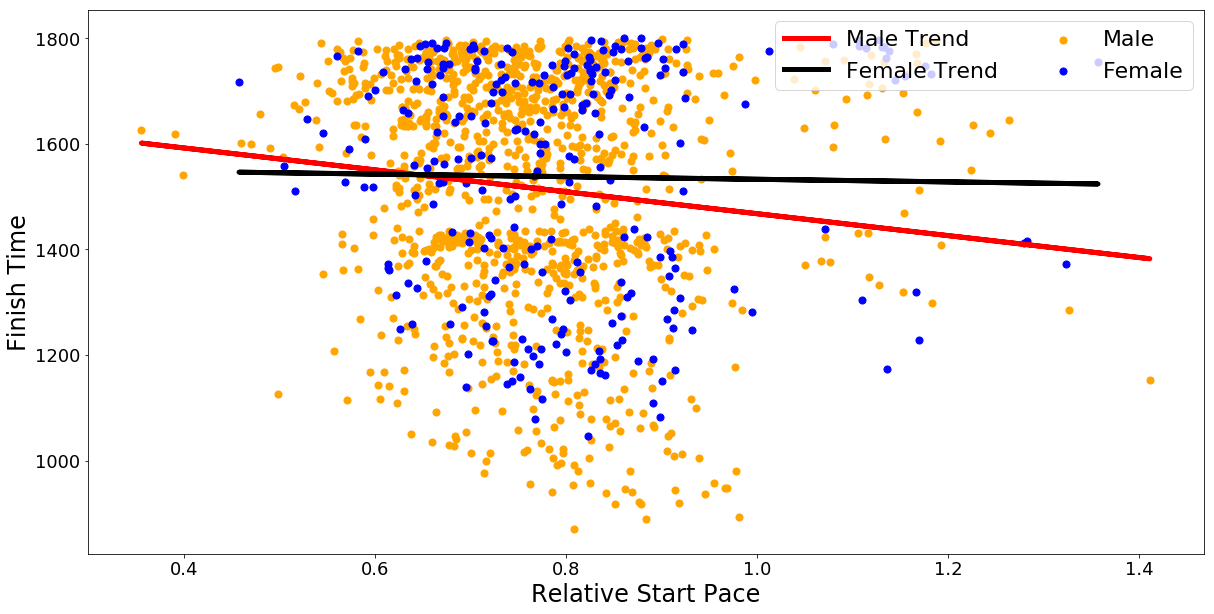

In [137]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 24)
ax1.set_xlabel('Relative Start Pace', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

### Start Pace vs Finish Time (2 Stages)

In [138]:
df3 = df3.join(gender)

In [139]:
df3.head()

,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,AVG_Pace,time,Start_Pace,Fast,Slow,gender
0,0.836325,0.674211,6.448759,870.066667,0.755268,True,False,Male
1,0.798754,0.653829,7.314765,954.883333,0.726292,True,False,Male
4,0.824679,0.655325,7.629802,1014.383333,0.740002,True,False,Male
6,0.784378,0.637018,7.735322,1019.283333,0.710698,True,False,Male
7,0.695118,0.578716,8.890250,1040.150000,0.636917,True,False,Male


In [140]:
male = df3.loc[df3['gender'] == 'Male']
female = df3.loc[df3['gender'] == 'Female']

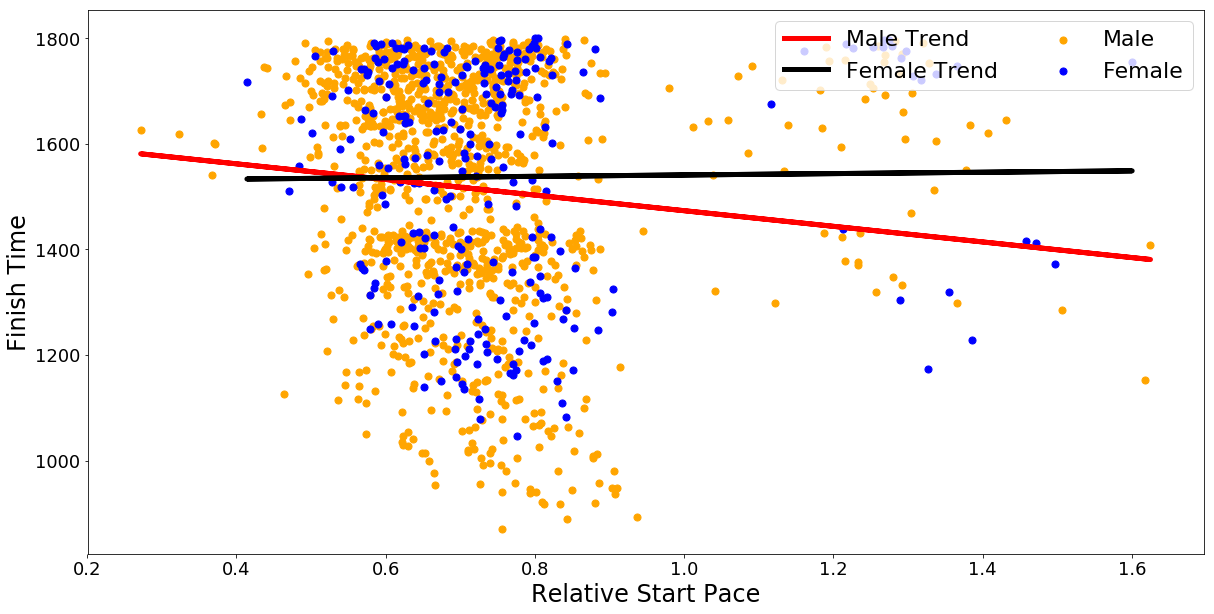

In [141]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='Start_Pace', y='time', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['Start_Pace']
y = male['time']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
x1 = female['Start_Pace']
y1 = female['time']
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('Finish Time', fontsize = 24)
ax1.set_xlabel('Relative Start Pace', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)